# Capstone project 

## Introduction 

This note book will exsplore the unrest faced by the unitedstats during the civial unrest. 

the data contains the city, number of murders, assults, the urban population and reported rapes of 50 cities in the USA.


In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [96]:
# Load data
df = pd.read_csv('UsArrests.csv',index_col=0)

In [136]:
df.head(50)

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


# EXPLORING THE DATA

In [60]:
df.isnull()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,False,False,False,False
Alaska,False,False,False,False
Arizona,False,False,False,False
Arkansas,False,False,False,False
California,False,False,False,False
Colorado,False,False,False,False
Connecticut,False,False,False,False
Delaware,False,False,False,False
Florida,False,False,False,False


Form the printout abouve it is clear that there is no NAN values in the data set 

In [61]:
dataT= df.dtypes
print(dataT)

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object


Here we can see that there is no missing values, there is also no strange data type like string that should be converted to be able to work with this data set.  

exsporing the data 

In [62]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


if we look at the table above we can see that 

for Murder - the mean is 7.78800
           - the STD is 4.35551	
           - the min is 0.80000	
           - the max is 17.40000

for Assault - the mean is 170.760000
            - the std is 83.337661
            - the min is 45
            - the max is 337

for urban population 
            - the mean is 65.540000
            - the std is 14.474763	
            - the min is 32.000000
            - the max is 91.000000
            
for rape - the mean is 21.232000
         - the std is 9.366385	
         - the min is 7.300000
         - the max is 46.000000
         
if we look at the 3 crimes, we can see that Assault​s is much more common then the other 2
with murder beining the lowest crime 
    

# PCA: UNSTANDARDISED DATA

In [73]:
# select and standardize features
X = StandardScaler().fit_transform(df.values)

#number of components to be generated
nr_comps = 4
pca = PCA(n_components=nr_comps)

#components
principal_components = pca.fit_transform(X)

# pandas data frame of component
pca_df = pd.DataFrame(principal_components, index=df.index)

pca_df.head(100)

,0,1,2,3
City,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


Here we can see what each city does to the data. 

if you look at Arizona
    1         2        3        4 
1.763164 -0.745957 0.054781 -0.834653

the higher the value the more it has an infnce on the that varubale, 

like 1.763164 is high that means that it will affect murder much more than Virginia with a value of -0.096335	


the highest murder rate is in florida with a PCA component of  3.013042	
the lowest murder rate is in North Dakota with a PCA componet of -2.992226

which means that florida will contrubute much more to the overall mean and STD then Northe Dakota. 


from the data it is cleare that the higher Assaults reported are we can exspect rape and murder to be higher proportionally as well, this indicates that the more violent a states popules the more likly they are to commint crimes worse than just assult 

# CORRELATION ANALYSIS

In [64]:
print(df.corr())

            Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000


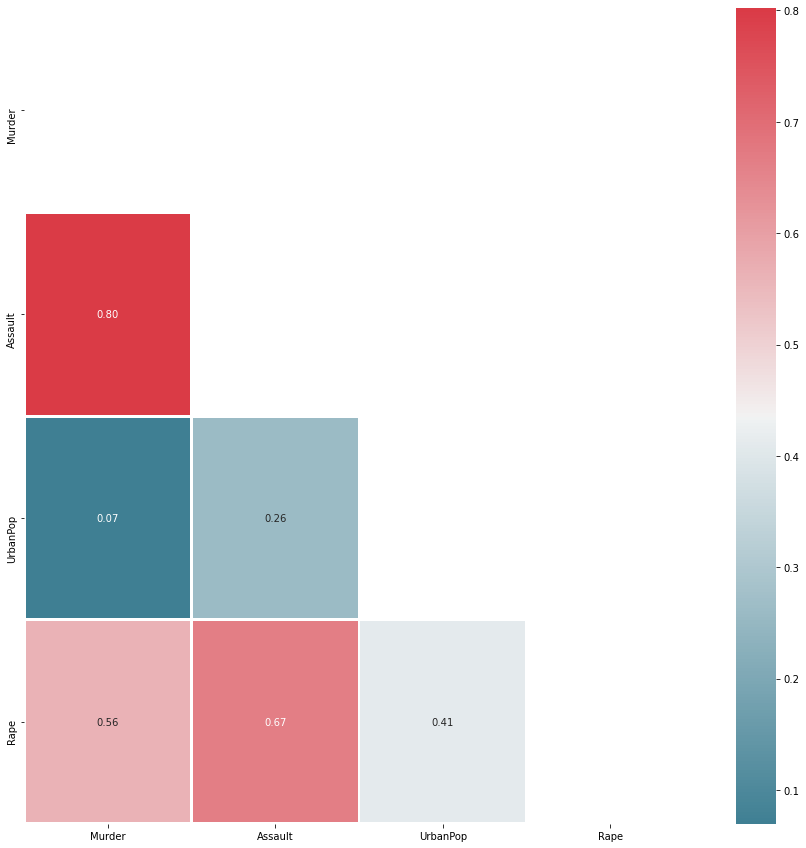

In [65]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()



  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

From the plot is cleare that murder and Assault has a very high correlation at 0.8 
which means that when murder rates increases or Assults increases that we can expect the other one to increase as well, because thy are positively linked. 

when we look at urban population, it is cleare that it has a very low correlation with muder rates at 0.07 which means that it does not affect murder in any way  and that there is no correlation 

when looking at murder and rape, there seems to be a some what strong correlation at 0.56


looking in depth at the chart we can see that urban population has almost no correlation between the varubales assault and murder, which means that it does not affact the data in any sicnificant way. However looking rape and urban pop we can see that it as 0.41 which  means it has a weak correlation so you can exspect that where the urbun populaion is higher more rape cases will be reported. 




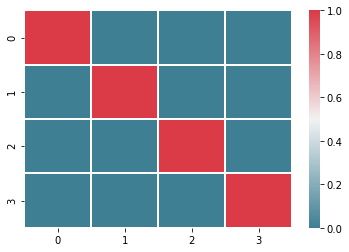

In [66]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

# CLUSTER ANALYSIS

Both Hierarchical Clustering and K-means will be performed on this data set 

In [74]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as scipy

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.metrics import accuracy_score, silhouette_score


Hierarchical clustering

In [97]:
X = df[['Murder','Assault',"UrbanPop","Rape"]]

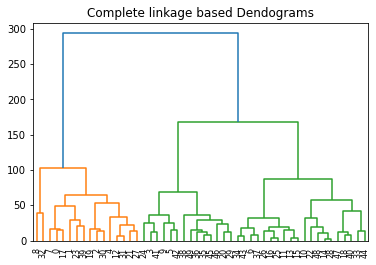

In [107]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='complete',metric='euclidean'),show_leaf_counts=True,) 

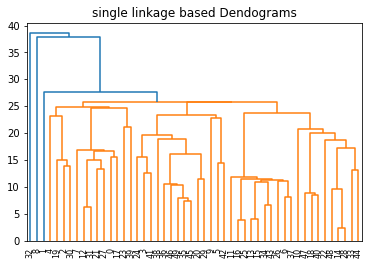

In [108]:
plt.title("single linkage based Dendograms")  
dend = dendrogram(linkage(X, method='single',metric='euclidean') ) 

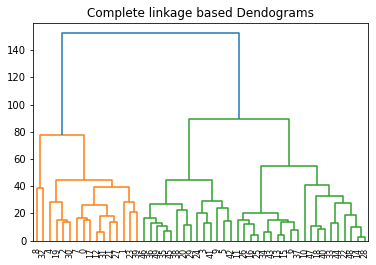

In [112]:
 plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='average',metric='euclidean') )

From the dendrograms above, the average linkage method creates the most
balanced dispersion of clusters and will therefore be the method of choice for the
rest 

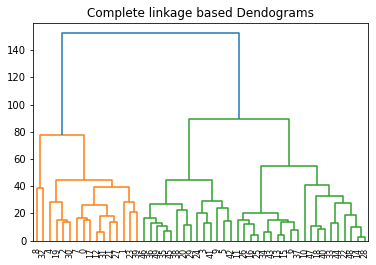

In [111]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='average',metric='euclidean') )

from the grath, we cans ee that it splitted the stats into 2 trees, 
with the orange one having 16 in it and the green one 34 in it.

at 90 - it looks like it has grouped them into classes where the murder rate and assuslt is high or low, 

if you look at Delaware(8),North Dakota(34)	compared to Indiana(14) and nevada (28), we can see that the ones in the organge tree is much lower than those of the green tree.

so the green tree could be seen as being more deadly due to more assults and other crimes.


In [130]:
# you can enter the number in the dendogram for which you woud like to see the corrosponding entry at the bottom of the table 
df.head(4)

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


K–means

In [131]:
# Import dependencies

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [132]:
k=4
X = df[['Murder','Assault',"UrbanPop","Rape"]].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(100, 2)


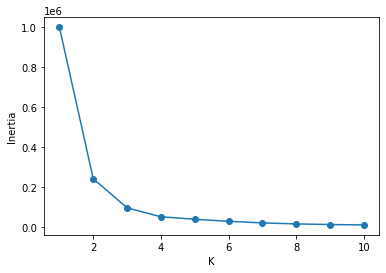

In [133]:
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)

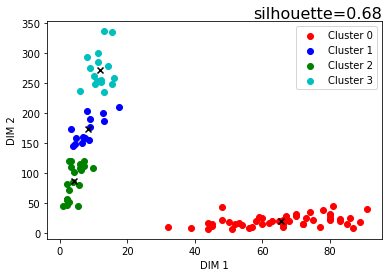

In [134]:
def scatter_Kmeans(x, k, r=1234):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('DIM 1')
    plt.ylabel('DIM 2')
    plt.legend()
    plt.show()

for k in range(1):
  scatter_Kmeans(X, 4, r=0)

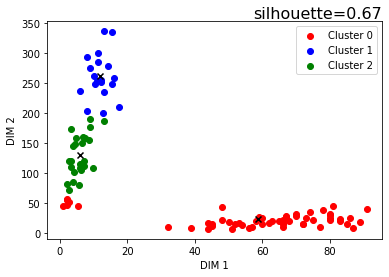

In [135]:
def scatter_Kmeans(x, k, r=1234):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('DIM 1')
    plt.ylabel('DIM 2')
    plt.legend()
    plt.show()

for k in range(1):
  scatter_Kmeans(X, 3, r=0)

from the abouth the elbow socre was obtaiend and tested the best fit wil be with k = 4, this gives us a silhouette score of 0.68 

K means clusterd the States into 4 main clusters
and it looks like it has clusted them with Muders and Assuslts, 
this is evednet when looking at the scales uesed when drawing the scatterplot. 